In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [67]:
def remove_commas_in_quotes(text):
    # This regex matches anything inside quotes and replaces commas with a space
    return re.sub(r'\"([^\"]*)\"', lambda match: '"' + match.group(1).replace(',', ' ') + '"', text)

In [68]:
car_prices_df = pd.read_csv('./Data/car_prices.csv', quotechar='"')

columns = car_prices_df.columns

car_prices_df['year'] = car_prices_df['year'].apply(remove_commas_in_quotes)

# df_split = car_prices_df['year'].str.split(',', expand=True)

pd.set_option('display.max_colwidth', None)  # This ensures no truncation

df_split = car_prices_df['year'].str.split(',', expand=True)
df_split.columns = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 
                    'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


df_split



C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\3385301734.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  car_prices_df = pd.read_csv('./Data/car_prices.csv', quotechar='"')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,"""kia motors america inc""",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST);
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,"""kia motors america inc""",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST);
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,"""financial services remarketing (lease)""",31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST);
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282,white,black,"""volvo na rep/world omni""",27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST);
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641,gray,black,"""financial services remarketing (lease)""",66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST);
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,in,4.5,18255,silver,black,"""avis corporation""",35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT);
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393,white,black,"""i -5 uhlmann rv""",30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT);
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561,black,black,"""financial services remarketing (lease)""",29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT);
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658,white,black,"""enterprise vehicle exchange / tra / rental / tulsa""",15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT);


In [69]:
car_prices = df_split

# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

In [70]:
car_prices.dropna(subset=['year', 'condition', 'odometer', 'mmr', 'sellingprice'], inplace=True)

car_prices = car_prices[car_prices['odometer'] != '']
car_prices = car_prices[car_prices['condition'] != '']
car_prices = car_prices[car_prices['body'] != '']


In [74]:
car_prices['year'] = car_prices['year'].astype(int)
car_prices['odometer'] = car_prices['odometer'].astype(int)
car_prices['condition'] = car_prices['condition'].astype(float)
car_prices['mmr'] = car_prices['mmr'].astype(int)
car_prices['sellingprice'] = car_prices['sellingprice'].astype(int)


In [75]:
car_prices = car_prices[car_prices['body'].isin(['Sedan', 'Convertible', 'SUV', 'Coupe'])]

# Create the pairplot with 'body' as the hue
# sns.pairplot(car_prices.loc[:, ['year', 'condition', 'odometer', 'mmr', 'sellingprice','body']],
#              corner=True,
#              diag_kind='kde',
#              hue='body')  

#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


<Axes: >

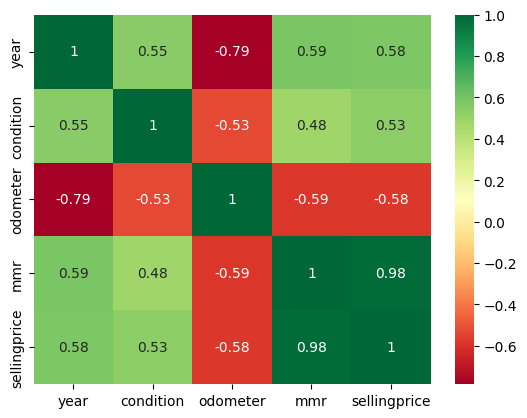

In [76]:
sns.heatmap(
    car_prices[['year', 'condition', 'odometer', 'mmr', 'sellingprice']].corr(),
    annot=True,
    cmap='RdYlGn'
)

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

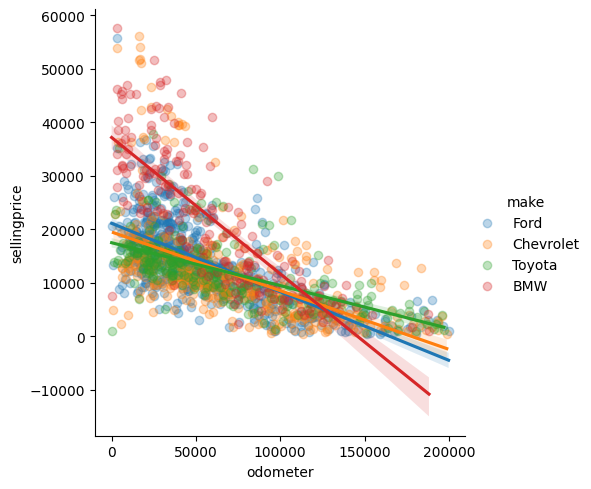

In [77]:
brand_list = ['Ford', 'Chevrolet', 'Toyota', 'BMW']
Value_retention_df = car_prices.copy()
Value_retention_df['make'] = pd.Categorical(Value_retention_df['make'],categories=brand_list ,ordered=True)

# Plot the lmplot
sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=Value_retention_df.query("make in @brand_list and sellingprice < 150000 and odometer < 200000").sample(1500),
    hue="make",
    scatter_kws={"alpha": .3},
)

In [78]:
import scipy.stats as stats

cars_regress = car_prices.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=np.float64(-0.11046146591239236), intercept=np.float64(20876.635359711152), rvalue=np.float64(-0.5819449815456094), pvalue=np.float64(0.0), stderr=np.float64(0.00026725328667604484), intercept_stderr=np.float64(22.40703881433098))

In [79]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (np.float64(-0.11213344766780227), np.float64(20404.378948713475))
Chevrolet: (np.float64(-0.09253749333699497), np.float64(18102.874670860576))
Toyota: (np.float64(-0.07123142307222019), np.float64(16926.878175952323))
BMW: (np.float64(-0.22016528008124955), np.float64(35441.46985465895))


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\3094723795.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


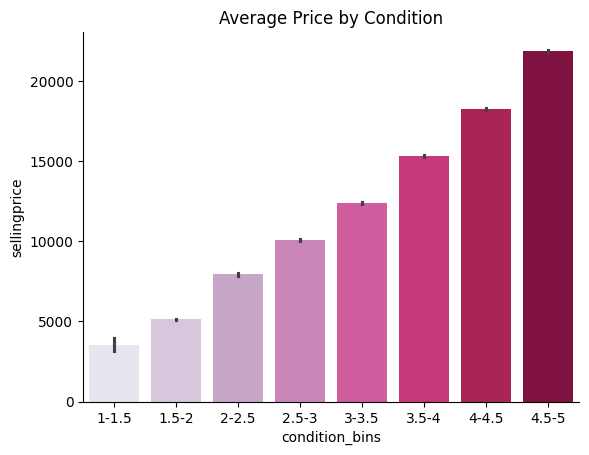

In [80]:
bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

fig,ax = plt.subplots()
car_prices["condition_bins"] = pd.cut(car_prices["condition"], bins=bins, labels=labels)

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=car_prices,
    palette='PuRd'
    
)

ax.set_title("Average Price by Condition")

sns.despine()

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [82]:
top_10_brands = car_prices['make'].value_counts().head(10).index

# Step 2: Create a pivot table
# We will group by 'make' and 'condition_bin', and calculate the mean of 'sellingprice'
pivot_table = car_prices[car_prices['make'].isin(top_10_brands)] \
    .pivot_table(
        index='make', 
        columns='condition_bins', 
        values='sellingprice', 
        aggfunc='mean'
    )
    
pivot_table

C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\3887492093.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4075.000000,6729.919908,10324.080560,12447.188264,16136.323669,21793.180583,28475.769270,35281.500000
Chevrolet,3303.205128,4891.751621,6753.729687,9951.003434,10805.584124,13925.866586,15680.713965,19894.892279
Dodge,4028.125000,5385.079825,7132.847414,10112.594503,10937.002397,14646.129820,15559.302648,19160.439970
Ford,3192.361111,4642.910396,7634.698795,9797.896097,12218.584814,14380.333053,16933.350176,19494.860401
Honda,4888.461538,4720.891865,7726.249328,8921.810811,11475.923979,13369.320927,15904.581568,18902.106319
Hyundai,3284.615385,5312.864900,7370.338294,8752.651667,10421.413595,11770.622767,13579.367104,16623.597365
Jeep,4068.181818,4897.728507,6960.820452,9643.007717,10742.178141,15687.374334,18982.172539,24086.666667
Mercedes-Benz,3353.846154,9763.976378,13461.767013,16126.351642,19259.847542,23695.830054,28062.461278,36550.105791
Nissan,3690.384615,5420.156561,8421.580007,10174.463988,12034.137469,13136.231975,14823.620897,16514.987845


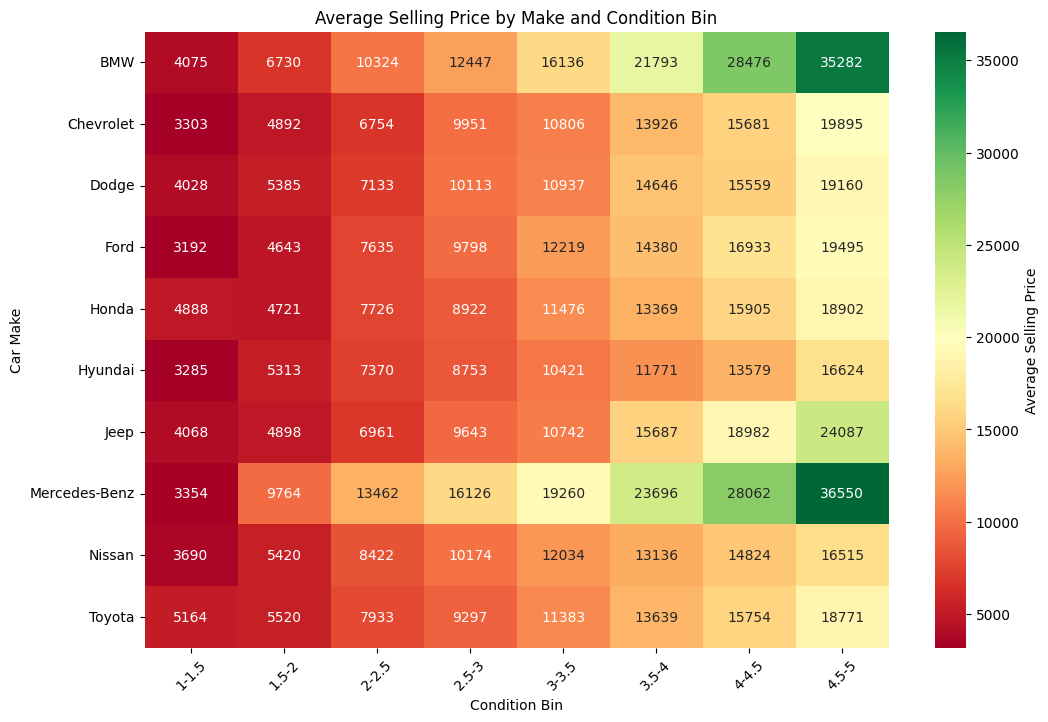

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap="RdYlGn", cbar_kws={'label': 'Average Selling Price'})
plt.title('Average Selling Price by Make and Condition Bin')
plt.xlabel('Condition Bin')
plt.ylabel('Car Make')
plt.xticks(rotation=45)  # Rotate column labels if necessary
plt.show()

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [90]:
f150s = df_split[df_split["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
983,2012,Ford,F-150,XLT,SuperCrew,,1ftew1cm9ckd05952,ca,4.6,51189,gray,gray,"""ford motor credit company llc pd""",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST);
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687,gray,black,"""ford motor credit company llc pd""",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST);
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465,black,gray,"""ford motor credit company llc pd""",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST);
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858,white,gray,"""aaero sweet company""",18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST);
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444,red,black,"""ford motor credit company llc pd""",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST);


In [122]:

f150s['sellingprice'] = f150s['sellingprice'].astype(int)
f150s['mmr'] = f150s['mmr'].astype(int)
print(f150s.dtypes)



year             object
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


<Axes: xlabel='sellingprice', ylabel='Count'>

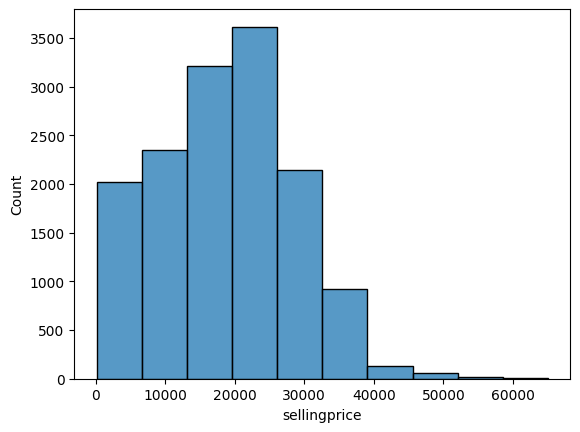

In [99]:
sns.histplot(x="sellingprice",
            bins=10,
            data=f150s)

* Build a barplot of `sellingprice` by `trim` for the F150s.

C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\3721125696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="sellingprice",


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'XLT'),
  Text(1, 0, 'FX2'),
  Text(2, 0, 'Lariat'),
  Text(3, 0, 'XL'),
  Text(4, 0, 'FX4'),
  Text(5, 0, 'STX'),
  Text(6, 0, 'Harley-Davidson'),
  Text(7, 0, 'King Ranch'),
  Text(8, 0, 'Limited'),
  Text(9, 0, 'Lariat Limited'),
  Text(10, 0, 'SVT Raptor'),
  Text(11, 0, 'Platinum'),
  Text(12, 0, '60th Anniversary'),
  Text(13, 0, 'SVT Lightning'),
  Text(14, 0, 'Work'),
  Text(15, 0, 'Base')])

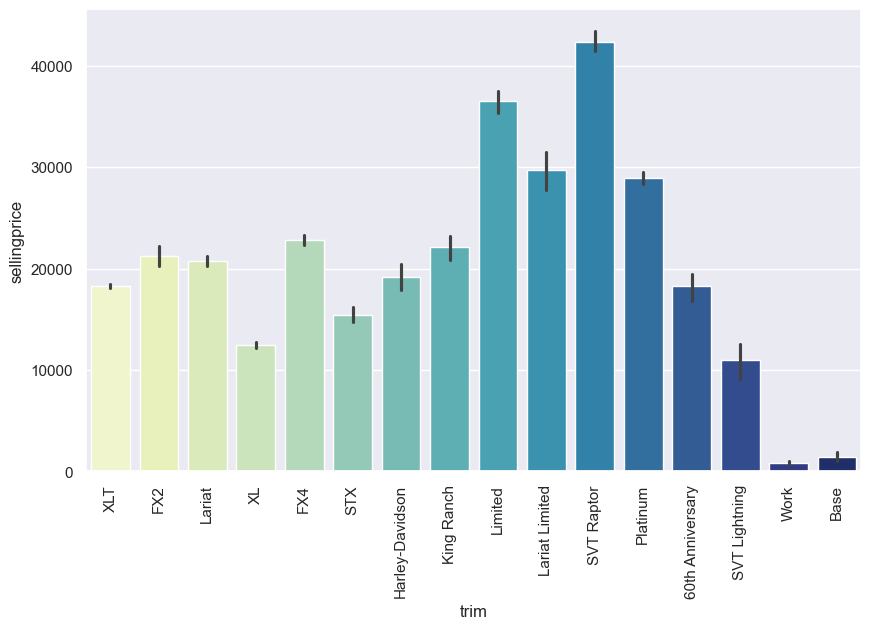

In [115]:
sns.set(rc={'figure.figsize':(10,6)})

sns.barplot(y="sellingprice", 
            x='trim', 
            data=f150s, 
            palette='YlGnBu')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

In [108]:
levels_list = ["XL", "XLT", "Platinum", "SVT Raptor"]
f150s = f150s[f150s['condition'] != '']

# Convert the 'condition' column to float
f150s['condition'] = f150s['condition'].astype(float)
f150s_filtered_level = f150s[f150s['trim'].isin(levels_list)]


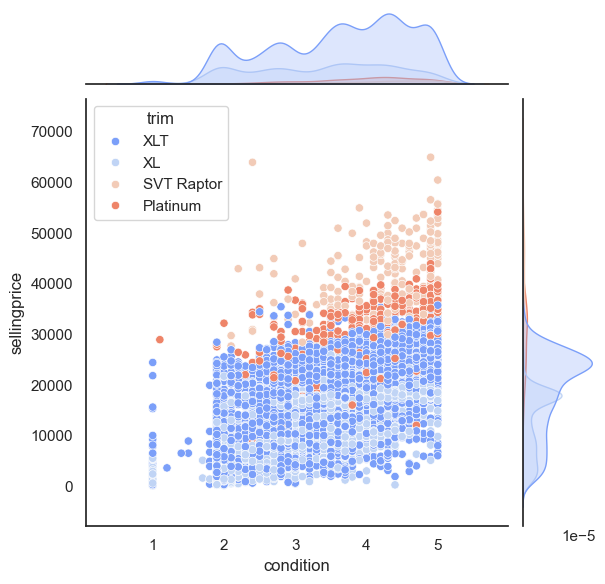

In [120]:
sns.set_style("white")
sns.jointplot(
    x='condition',
    y='sellingprice',
    data=f150s_filtered_level,
    kind='scatter',
    hue='trim',
    palette='coolwarm',
)


### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

In [135]:
f150s = f150s[(f150s['color'] != '') & (f150s['color'] != '—')]

# Sort by 'color'
f150s = f150s.sort_values(by='color')

# Get the unique colors in a list
color_list = list(set(f150s['color']))
color_list

['gray',
 'silver',
 'beige',
 'brown',
 'green',
 'off-white',
 'purple',
 'charcoal',
 'black',
 'white',
 'turquoise',
 'burgundy',
 'orange',
 'blue',
 'red',
 'gold',
 'yellow']

C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\1273722571.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


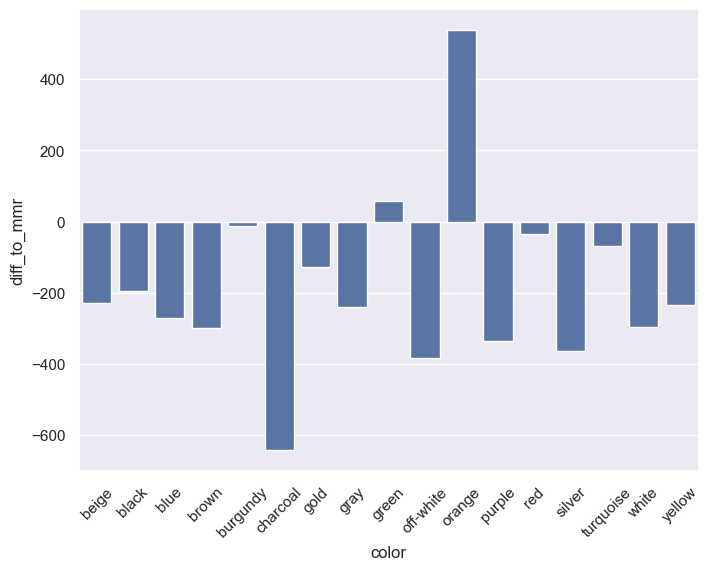

In [140]:
sns.set_style("darkgrid")

f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"] - f150s["mmr"])

fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(
    x="color",
    y="diff_to_mmr",
    data=f150s,
    ci=None,
)

plt.xticks(rotation=45)

plt.show()

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

In [144]:
bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

f150s["condition_bins"] = pd.cut(f150s["condition"], bins=bins, labels=labels)

In [145]:
f150s["year"]  = f150s['year'].astype(int)
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced["year"].between(2009, 2014)]
    .pivot_table(
        index="trim",
        columns="condition_bins",
        values={"sellingprice": "mean"}
    )
)

f150s_pivot

C:\Users\awx1407711\AppData\Local\Temp\ipykernel_4012\4071345709.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


sellingprice                                            \
condition_bins         1.5-2         2-2.5         2.5-3         3-3.5   
trim                                                                     
Platinum        25570.000000  25423.076923  23875.555556  27172.115385   
SVT Raptor               NaN  38464.285714  36392.857143  36950.000000   
XL               8088.888889  12196.478873  12778.697917  15385.024155   
XLT             15695.673077  17076.315789  18704.068966  20049.377593   

                                                          
condition_bins         3.5-4         4-4.5         4.5-5  
trim                                                      
Platinum        26536.746988  29403.719008  33384.210526  
SVT Raptor      40235.294118  42352.678571  45844.594595  
XL              16177.627628  17496.891192  18575.735294  
XLT             21198.636927  23169.243433  25039.216620

<Axes: xlabel='None-condition_bins', ylabel='trim'>

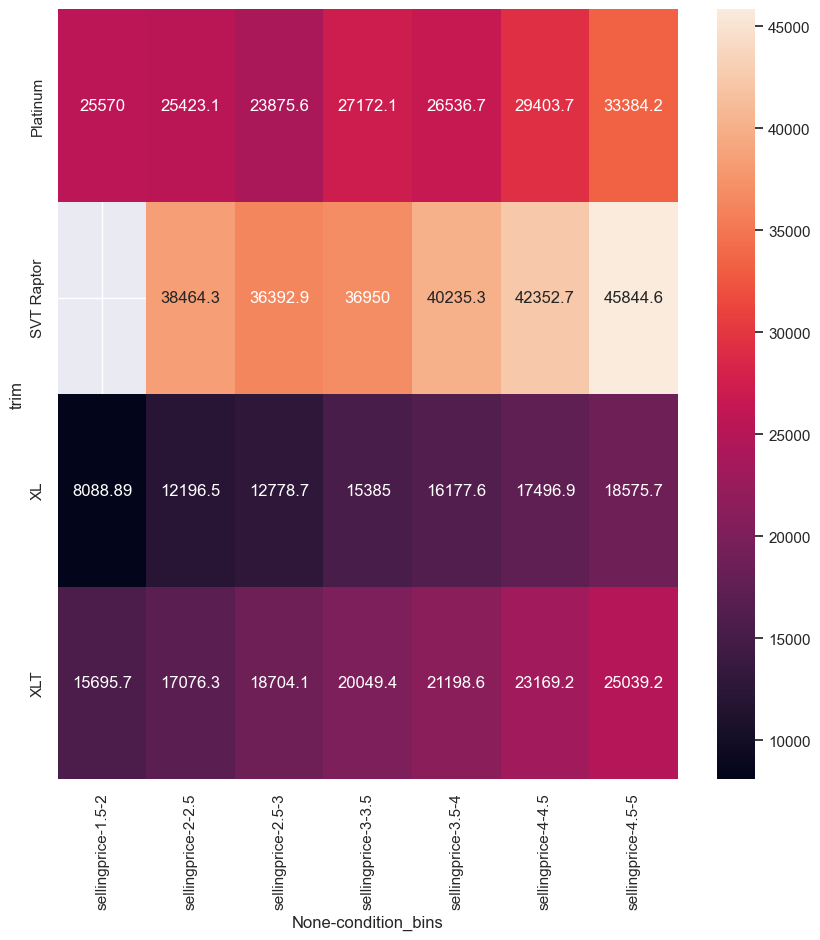

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(f150s_pivot, annot=True, fmt="g")

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

<Axes: xlabel='state', ylabel='auto_count'>

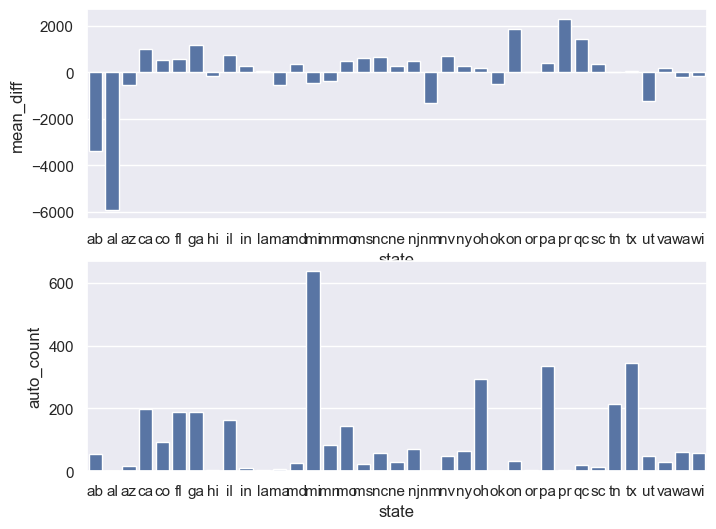

In [147]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)

fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


* Ok, looks like Utah, `state=='ut'`, (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [148]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})



diff_to_mmr      
                                                 mean count
saledate                                                   
Wed Feb 04 2015 03:30:00 GMT-0800 (PST); -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST); -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST);  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST);  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST); -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST);  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT); -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST);  -600.000000     5